In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np

In [28]:
def gpwClass(idx):
 dicClass = {
     '1':['Other',1],
     '2':['Natural and Semi-natural grass',2],
     '3':['Seeded grass',3],
     '4':['Crops and other related agricultural practices',1],
     '5':['Other',3],
     '6':['Natural and Semi-natural grass',2],
     '7':['Other',3],
     '8':['Other',0],
     '9':['Other',0],
     '10':['Other',0],
 }
 return {'class':dicClass[idx][0],'weight':dicClass[idx][1]}

def getClass(value):
  dicClass = {
     '1':'Tree Cover',
     '2':'Shrub Cover',
     '3':'Herbaceous Vegetation / Grassland',
     '4':'Cultivated and Managed',
     '5':'Mosaic: Cultivated and Managed / Natural Vegetation',
     '6':'Regularly Flooded / Wetland',
     '7':'Urban / Built Up',
     '8':'Snow and Ice',
     '9':'Barren',
     '10':'Open Water'
  }
  return dicClass[value]

def getdate(value):
    try:
        a = pd.to_datetime(value)
        a = a.year
    except:
        a = -1
    return a

In [6]:
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=7)

### Get data from Geo-Wiki

In [7]:
originalData = '/media/bernard/Data/LAPIG/Doutorado/Global_Pasture_Watch/datasets/05_GeoWiki/2012/Global_LULC_reference_data.csv'
df = pd.read_csv(originalData)
df

,competition,pixelID,userID,lon,lat,HI1,LC1,perc1,HI2,LC2,...,perc3,confidence_HI,confidence_LC,highres,morethan3,transaction,googleimagedate,fieldsize,abandoned,confidence_AB
0,1,507,8,42.487500,58.820833,45,5,100,NaN,NaN,...,0,30,0.0,0,0,2011-08-31 15:16:47.206812,NaN,NaN,NaN,0.0
1,1,1971,35,29.529167,-19.654167,25,3,100,NaN,NaN,...,0,0,10.0,0,0,2011-09-01 13:33:05.845536,2007-11-01,NaN,NaN,20.0
2,1,373,35,34.137500,56.329167,25,1,100,NaN,NaN,...,0,10,10.0,0,0,2011-09-01 13:56:24.96897,2003-05-26,NaN,NaN,20.0
3,1,2931,35,-80.695833,44.145833,55,4,100,NaN,NaN,...,0,0,0.0,0,0,2011-09-01 13:58:19.386275,2009-05-09,NaN,NaN,20.0
4,1,904,35,-70.029167,-42.287500,0,3,100,NaN,NaN,...,0,0,10.0,0,0,2011-09-01 13:59:34.28332,NaN,NaN,NaN,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151937,4,0,919,-0.004167,-0.004167,0,10,100,0.0,NaN,...,0,0,0.0,0,0,2012-07-18 17:02:03.650627,NaN,NaN,NaN,NaN
151938,4,0,982,-0.004167,-0.004167,0,10,100,0.0,NaN,...,0,0,0.0,0,0,2012-07-18 17:03:13.756609,NaN,NaN,NaN,NaN
151939,4,0,982,-0.004167,-0.004167,0,10,100,0.0,NaN,...,0,0,0.0,0,0,2012-07-18 17:03:27.454908,NaN,NaN,NaN,NaN
151940,4,0,919,-0.004167,-0.004167,0,10,100,0.0,NaN,...,0,0,0.0,0,0,2012-07-18 17:03:48.646347,NaN,NaN,NaN,NaN


In [8]:
(round((df.isnull().sum()/df.shape[0])*100,2)).head(50)

competition         0.00
pixelID             0.00
userID              0.00
lon                 0.00
lat                 0.00
HI1                 0.00
LC1                 0.00
perc1               0.00
HI2                67.17
LC2                67.52
perc2               0.00
HI3                55.05
LC3                90.79
perc3               0.00
confidence_HI       0.00
confidence_LC       0.00
highres             0.00
morethan3           0.00
transaction         0.00
googleimagedate    59.35
fieldsize          85.84
abandoned          65.04
confidence_AB      64.94
dtype: float64

In [10]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['competition', 'pixelID', 'userID', 'lon', 'lat', 'HI1', 'LC1', 'perc1',
       'HI2', 'LC2', 'perc2', 'HI3', 'LC3', 'perc3', 'confidence_HI',
       'confidence_LC', 'highres', 'morethan3', 'transaction',
       'googleimagedate', 'fieldsize', 'abandoned', 'confidence_AB'],
      dtype='object')

In [11]:
dfCopy = df.copy()[['lon', 'lat', 'HI1', 'LC1', 'perc1',
       'HI2', 'LC2', 'perc2', 'HI3', 'LC3', 'perc3','transaction']]
dfCopy

,lon,lat,HI1,LC1,perc1,HI2,LC2,perc2,HI3,LC3,perc3,transaction
0,42.487500,58.820833,45,5,100,NaN,NaN,0,NaN,NaN,0,2011-08-31 15:16:47.206812
1,29.529167,-19.654167,25,3,100,NaN,NaN,0,NaN,NaN,0,2011-09-01 13:33:05.845536
2,34.137500,56.329167,25,1,100,NaN,NaN,0,NaN,NaN,0,2011-09-01 13:56:24.96897
3,-80.695833,44.145833,55,4,100,NaN,NaN,0,NaN,NaN,0,2011-09-01 13:58:19.386275
4,-70.029167,-42.287500,0,3,100,NaN,NaN,0,NaN,NaN,0,2011-09-01 13:59:34.28332
...,...,...,...,...,...,...,...,...,...,...,...,...
151937,-0.004167,-0.004167,0,10,100,0.0,NaN,0,0.0,NaN,0,2012-07-18 17:02:03.650627
151938,-0.004167,-0.004167,0,10,100,0.0,NaN,0,0.0,NaN,0,2012-07-18 17:03:13.756609
151939,-0.004167,-0.004167,0,10,100,0.0,NaN,0,0.0,NaN,0,2012-07-18 17:03:27.454908
151940,-0.004167,-0.004167,0,10,100,0.0,NaN,0,0.0,NaN,0,2012-07-18 17:03:48.646347


In [12]:
geoWi = dfCopy.copy()
geoWi['dataset_name'] = 'GeoWiki'
geoWi


,lon,lat,HI1,LC1,perc1,HI2,LC2,perc2,HI3,LC3,perc3,transaction,dataset_name
0,42.487500,58.820833,45,5,100,NaN,NaN,0,NaN,NaN,0,2011-08-31 15:16:47.206812,GeoWiki
1,29.529167,-19.654167,25,3,100,NaN,NaN,0,NaN,NaN,0,2011-09-01 13:33:05.845536,GeoWiki
2,34.137500,56.329167,25,1,100,NaN,NaN,0,NaN,NaN,0,2011-09-01 13:56:24.96897,GeoWiki
3,-80.695833,44.145833,55,4,100,NaN,NaN,0,NaN,NaN,0,2011-09-01 13:58:19.386275,GeoWiki
4,-70.029167,-42.287500,0,3,100,NaN,NaN,0,NaN,NaN,0,2011-09-01 13:59:34.28332,GeoWiki
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151937,-0.004167,-0.004167,0,10,100,0.0,NaN,0,0.0,NaN,0,2012-07-18 17:02:03.650627,GeoWiki
151938,-0.004167,-0.004167,0,10,100,0.0,NaN,0,0.0,NaN,0,2012-07-18 17:03:13.756609,GeoWiki
151939,-0.004167,-0.004167,0,10,100,0.0,NaN,0,0.0,NaN,0,2012-07-18 17:03:27.454908,GeoWiki
151940,-0.004167,-0.004167,0,10,100,0.0,NaN,0,0.0,NaN,0,2012-07-18 17:03:48.646347,GeoWiki


In [14]:
geoWi['idxMax'] = geoWi[['perc1','perc2','perc3']].apply(lambda x: np.argmax(x),axis=1)
geoWi['original_lulc_class'] = geoWi.apply(lambda x: getClass(str(int(x['LC'+str(x.idxMax+1)]))),axis=1)
geoWi['gpw_lulc_class'] = geoWi.apply(lambda x: gpwClass(str(int(x['LC'+str(x.idxMax+1)])))['class'],axis=1)
geoWi['sample_weight'] = geoWi.apply(lambda x: float((x['perc'+str(x.idxMax+1)])/100),axis=1)

geoWi

,lon,lat,HI1,LC1,perc1,HI2,LC2,perc2,HI3,LC3,perc3,transaction,dataset_name,idxMax,original_lulc_class,gpw_lulc_class,sample_weight
0,42.487500,58.820833,45,5,100,NaN,NaN,0,NaN,NaN,0,2011-08-31 15:16:47.206812,GeoWiki,0,Mosaic: Cultivated and Managed / Natural Veget...,Other,1.0
1,29.529167,-19.654167,25,3,100,NaN,NaN,0,NaN,NaN,0,2011-09-01 13:33:05.845536,GeoWiki,0,Herbaceous Vegetation / Grassland,Seeded grass,1.0
2,34.137500,56.329167,25,1,100,NaN,NaN,0,NaN,NaN,0,2011-09-01 13:56:24.96897,GeoWiki,0,Tree Cover,Other,1.0
3,-80.695833,44.145833,55,4,100,NaN,NaN,0,NaN,NaN,0,2011-09-01 13:58:19.386275,GeoWiki,0,Cultivated and Managed,Crops and other related agricultural practices,1.0
4,-70.029167,-42.287500,0,3,100,NaN,NaN,0,NaN,NaN,0,2011-09-01 13:59:34.28332,GeoWiki,0,Herbaceous Vegetation / Grassland,Seeded grass,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151937,-0.004167,-0.004167,0,10,100,0.0,NaN,0,0.0,NaN,0,2012-07-18 17:02:03.650627,GeoWiki,0,Open Water,Other,1.0
151938,-0.004167,-0.004167,0,10,100,0.0,NaN,0,0.0,NaN,0,2012-07-18 17:03:13.756609,GeoWiki,0,Open Water,Other,1.0
151939,-0.004167,-0.004167,0,10,100,0.0,NaN,0,0.0,NaN,0,2012-07-18 17:03:27.454908,GeoWiki,0,Open Water,Other,1.0
151940,-0.004167,-0.004167,0,10,100,0.0,NaN,0,0.0,NaN,0,2012-07-18 17:03:48.646347,GeoWiki,0,Open Water,Other,1.0


In [18]:
geoWi[geoWi.idxMax == 1]

,lon,lat,HI1,LC1,perc1,HI2,LC2,perc2,HI3,LC3,perc3,transaction,dataset_name,idxMax,original_lulc_class,gpw_lulc_class,sample_weight
53285,125.512500,-8.737500,20,1,35,NaN,3.0,65,NaN,NaN,0,2012-01-24 17:53:58.049264,GeoWiki,1,Herbaceous Vegetation / Grassland,Seeded grass,0.65
53294,24.744444,-27.433333,0,2,40,NaN,3.0,45,NaN,9.0,0,2012-01-24 18:00:20.101429,GeoWiki,1,Herbaceous Vegetation / Grassland,Seeded grass,0.45
53380,24.744444,-27.433333,0,2,10,NaN,9.0,90,NaN,NaN,0,2012-01-25 09:28:25.335623,GeoWiki,1,Barren,Other,0.90
53421,119.888889,30.600000,60,1,40,NaN,4.0,60,NaN,NaN,0,2012-02-02 11:01:59.398198,GeoWiki,1,Cultivated and Managed,Crops and other related agricultural practices,0.60
53425,119.900000,30.600000,65,1,35,NaN,7.0,40,NaN,9.0,10,2012-02-02 11:05:48.939707,GeoWiki,1,Urban / Built Up,Other,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147925,-66.745833,17.995833,65,1,35,70.0,3.0,40,65.0,10.0,15,2012-07-16 10:34:52.624038,GeoWiki,1,Herbaceous Vegetation / Grassland,Seeded grass,0.40
148082,111.579167,26.712500,5,3,35,15.0,2.0,40,0.0,NaN,0,2012-07-16 12:02:26.621904,GeoWiki,1,Shrub Cover,Natural and Semi-natural grass,0.40
148175,110.770833,-6.679167,5,1,20,70.0,4.0,30,5.0,2.0,10,2012-07-16 13:24:01.779738,GeoWiki,1,Cultivated and Managed,Crops and other related agricultural practices,0.30
151075,102.562500,25.462500,70,9,40,40.0,1.0,45,35.0,2.0,15,2012-07-18 08:04:18.553219,GeoWiki,1,Tree Cover,Other,0.45


In [19]:
geoWi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151942 entries, 0 to 151941
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   lon                  151942 non-null  float64
 1   lat                  151942 non-null  float64
 2   HI1                  151942 non-null  int64  
 3   LC1                  151942 non-null  int64  
 4   perc1                151942 non-null  int64  
 5   HI2                  49875 non-null   float64
 6   LC2                  49351 non-null   float64
 7   perc2                151942 non-null  int64  
 8   HI3                  68305 non-null   float64
 9   LC3                  13991 non-null   float64
 10  perc3                151942 non-null  int64  
 11  transaction          151942 non-null  object 
 12  dataset_name         151942 non-null  object 
 13  idxMax               151942 non-null  int64  
 14  original_lulc_class  151942 non-null  object 
 15  gpw_lulc_class   

In [32]:
geoWi['reference_year'] = geoWi['transaction'].apply(lambda x: getdate(x))
geoWi

,lon,lat,HI1,LC1,perc1,HI2,LC2,perc2,HI3,LC3,perc3,transaction,dataset_name,idxMax,original_lulc_class,gpw_lulc_class,sample_weight,reference_year
0,42.487500,58.820833,45,5,100,NaN,NaN,0,NaN,NaN,0,2011-08-31 15:16:47.206812,GeoWiki,0,Mosaic: Cultivated and Managed / Natural Veget...,Other,1.0,2011
1,29.529167,-19.654167,25,3,100,NaN,NaN,0,NaN,NaN,0,2011-09-01 13:33:05.845536,GeoWiki,0,Herbaceous Vegetation / Grassland,Seeded grass,1.0,2011
2,34.137500,56.329167,25,1,100,NaN,NaN,0,NaN,NaN,0,2011-09-01 13:56:24.96897,GeoWiki,0,Tree Cover,Other,1.0,2011
3,-80.695833,44.145833,55,4,100,NaN,NaN,0,NaN,NaN,0,2011-09-01 13:58:19.386275,GeoWiki,0,Cultivated and Managed,Crops and other related agricultural practices,1.0,2011
4,-70.029167,-42.287500,0,3,100,NaN,NaN,0,NaN,NaN,0,2011-09-01 13:59:34.28332,GeoWiki,0,Herbaceous Vegetation / Grassland,Seeded grass,1.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151937,-0.004167,-0.004167,0,10,100,0.0,NaN,0,0.0,NaN,0,2012-07-18 17:02:03.650627,GeoWiki,0,Open Water,Other,1.0,2012
151938,-0.004167,-0.004167,0,10,100,0.0,NaN,0,0.0,NaN,0,2012-07-18 17:03:13.756609,GeoWiki,0,Open Water,Other,1.0,2012
151939,-0.004167,-0.004167,0,10,100,0.0,NaN,0,0.0,NaN,0,2012-07-18 17:03:27.454908,GeoWiki,0,Open Water,Other,1.0,2012
151940,-0.004167,-0.004167,0,10,100,0.0,NaN,0,0.0,NaN,0,2012-07-18 17:03:48.646347,GeoWiki,0,Open Water,Other,1.0,2012


In [33]:
geoWi.reference_year.unique()

array([2011, 2012])

In [34]:
geoWiFinal = geoWi[['lat','lon','dataset_name', 'reference_year', 'original_lulc_class', 'gpw_lulc_class', 'sample_weight']].copy()
geoWiFinal

,lat,lon,dataset_name,reference_year,original_lulc_class,gpw_lulc_class,sample_weight
0,58.820833,42.487500,GeoWiki,2011,Mosaic: Cultivated and Managed / Natural Veget...,Other,1.0
1,-19.654167,29.529167,GeoWiki,2011,Herbaceous Vegetation / Grassland,Seeded grass,1.0
2,56.329167,34.137500,GeoWiki,2011,Tree Cover,Other,1.0
3,44.145833,-80.695833,GeoWiki,2011,Cultivated and Managed,Crops and other related agricultural practices,1.0
4,-42.287500,-70.029167,GeoWiki,2011,Herbaceous Vegetation / Grassland,Seeded grass,1.0
...,...,...,...,...,...,...,...
151937,-0.004167,-0.004167,GeoWiki,2012,Open Water,Other,1.0
151938,-0.004167,-0.004167,GeoWiki,2012,Open Water,Other,1.0
151939,-0.004167,-0.004167,GeoWiki,2012,Open Water,Other,1.0
151940,-0.004167,-0.004167,GeoWiki,2012,Open Water,Other,1.0


<AxesSubplot:>

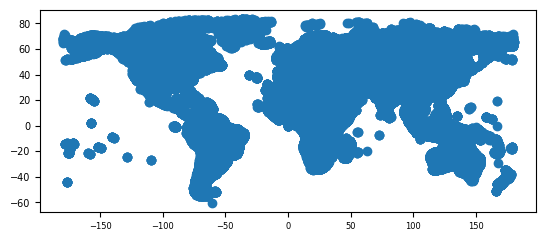

In [38]:
crs = "EPSG:4326"
newdf = gpd.GeoDataFrame(geoWiFinal, geometry=gpd.points_from_xy(geoWiFinal.lon, geoWiFinal.lat),crs=crs)
newdf.plot()

In [39]:
newdf['observation'] = ''

In [40]:
newdf.head(5)

,lat,lon,dataset_name,reference_year,original_lulc_class,gpw_lulc_class,sample_weight,geometry,observation
0,58.820833,42.487500,GeoWiki,2011,Mosaic: Cultivated and Managed / Natural Veget...,Other,1.0,POINT (42.48750 58.82083),
1,-19.654167,29.529167,GeoWiki,2011,Herbaceous Vegetation / Grassland,Seeded grass,1.0,POINT (29.52917 -19.65417),
2,56.329167,34.137500,GeoWiki,2011,Tree Cover,Other,1.0,POINT (34.13750 56.32917),
3,44.145833,-80.695833,GeoWiki,2011,Cultivated and Managed,Crops and other related agricultural practices,1.0,POINT (-80.69583 44.14583),
4,-42.287500,-70.029167,GeoWiki,2011,Herbaceous Vegetation / Grassland,Seeded grass,1.0,POINT (-70.02917 -42.28750),


In [42]:
newdf.iloc[:,2:]

,dataset_name,reference_year,original_lulc_class,gpw_lulc_class,sample_weight,geometry,observation
0,GeoWiki,2011,Mosaic: Cultivated and Managed / Natural Veget...,Other,1.0,POINT (42.48750 58.82083),
1,GeoWiki,2011,Herbaceous Vegetation / Grassland,Seeded grass,1.0,POINT (29.52917 -19.65417),
2,GeoWiki,2011,Tree Cover,Other,1.0,POINT (34.13750 56.32917),
3,GeoWiki,2011,Cultivated and Managed,Crops and other related agricultural practices,1.0,POINT (-80.69583 44.14583),
4,GeoWiki,2011,Herbaceous Vegetation / Grassland,Seeded grass,1.0,POINT (-70.02917 -42.28750),
...,...,...,...,...,...,...,...
151937,GeoWiki,2012,Open Water,Other,1.0,POINT (-0.00417 -0.00417),
151938,GeoWiki,2012,Open Water,Other,1.0,POINT (-0.00417 -0.00417),
151939,GeoWiki,2012,Open Water,Other,1.0,POINT (-0.00417 -0.00417),
151940,GeoWiki,2012,Open Water,Other,1.0,POINT (-0.00417 -0.00417),


In [43]:
srcout = '/media/bernard/Data/LAPIG/Doutorado/Global_Pasture_Watch/datasets/harmonized_databases/05_db_geowiki.parquet'
newdf.iloc[:,2:].to_parquet(srcout)